In [106]:
import torch
from torch import nn
import matplotlib.pyplot as plt


In [144]:
#creating known data using linear regression
#linear retgression is this Y=mx+b it creates a straight line that best fits our data
#weight = m bias = b

weight=0.7
bias=0.3

start=0
end=1
step=0.02
X=torch.arange(start,end,step).unsqueeze(dim=1)
y= weight*X + bias

In [3]:
X[:10],y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [145]:
#splitting data into training and test sets
train_split=int(0.8*len(X))

x_train=X[:train_split]
y_train=y[:train_split]

x_test=X[train_split:]
y_test=y[train_split:]
len(x_train), len(y_train), len(x_test), len(y_test)

(40, 40, 10, 10)

In [4]:
def plot_pred(train_data=x_train,train_label=y_train,test_data=x_test,test_label=y_test,predictions=None):
  "plot"
  plt.figure(figsize=(10,7))
  plt.scatter(train_data,train_label,c="b",s=4,label="training data")

  plt.scatter(test_data,test_label,c="r",s=4,label="testing data")

  if predictions!=None:
    plt.scatter(test_data,predictions,c="g",s=4,label="predictions")
  plt.legend(prop={"size":14})

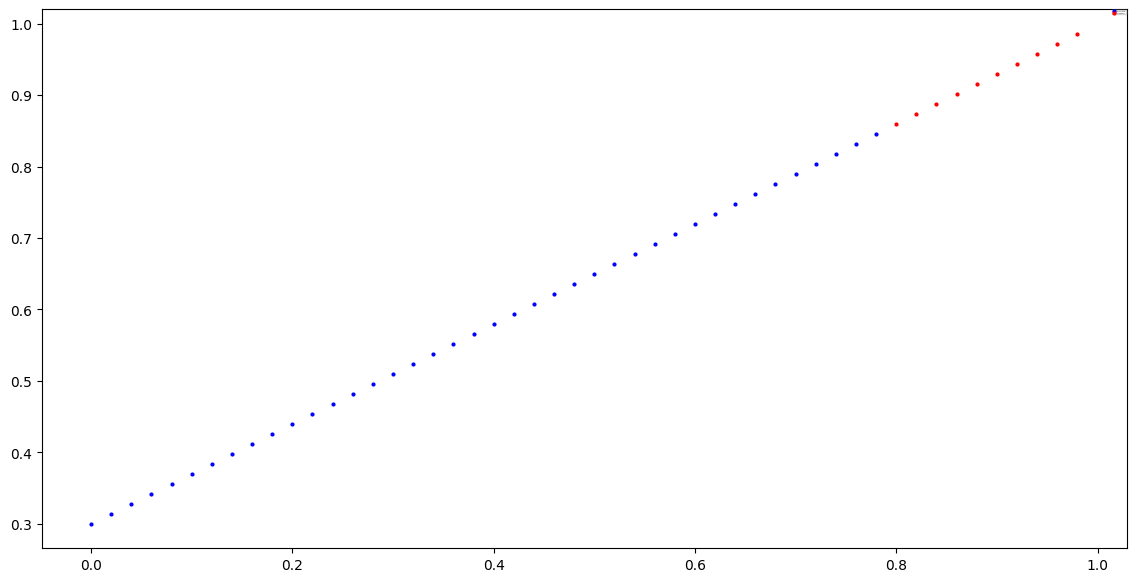

In [6]:
plot_pred()

In [109]:
class LinearRegressionModel(nn.Module):#inherits from nn.module
  def __init__(self):
    super().__init__()
    self.weight=nn.Parameter(torch.randn(1,requires_grad=True,dtype=torch.float))
    self.bias=nn.Parameter(torch.randn(1,requires_grad=True,dtype=torch.float))
  def forward(self, x:torch.tensor)->torch.tensor:#-> annotates the return type
    return self.weight*x+self.bias

In [146]:
torch.manual_seed(42)

model_0=LinearRegressionModel()
model_0.state_dict()

OrderedDict([('weight', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [29]:
#making predictions using inferance
with torch.inference_mode():#turns of gradient because we dont need it while running our model and makes inferance more performant
  y_pred = model_0(x_test)
y_pred,y_test

(tensor([[0.3982],
         [0.4049],
         [0.4116],
         [0.4184],
         [0.4251],
         [0.4318],
         [0.4386],
         [0.4453],
         [0.4520],
         [0.4588]]),
 tensor([[0.8600],
         [0.8740],
         [0.8880],
         [0.9020],
         [0.9160],
         [0.9300],
         [0.9440],
         [0.9580],
         [0.9720],
         [0.9860]]))

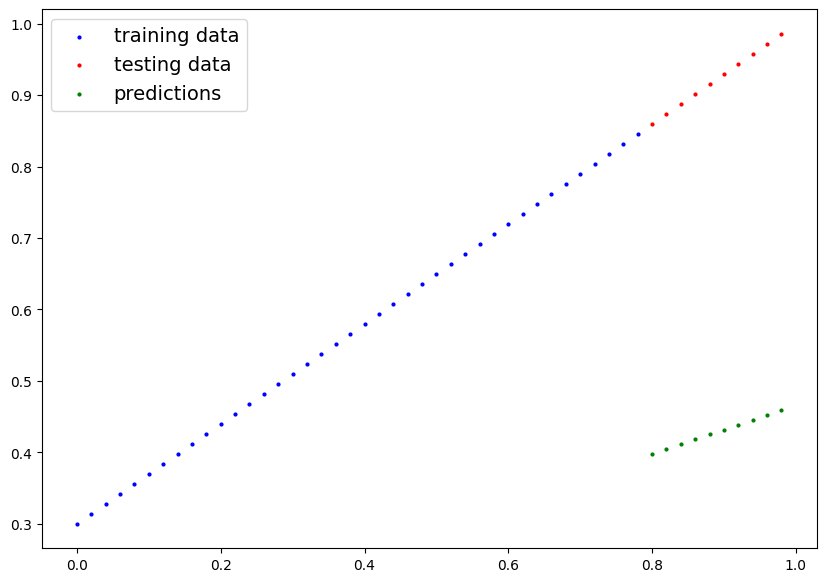

In [34]:
plot_pred(predictions=y_pred)

In [147]:
#train model using a loss function and optimizer

#set up a loss function
loss_fn=nn.L1Loss()
loss_fn


#set up an optimizer
optimizer=torch.optim.SGD(params=model_0.parameters(),lr=0.01)

In [148]:
#building a training loop and testing loop
#loop through the data
#forward propagation
#calculate the loss
#optimizer
#loss backward(backpropagation)
#optimizer step

torch.manual_seed(42)
epochs=200   #this is a hyperparameter hyperparameters are parameters we set ourselves
epoch_count=[]
loss_values=[]
test_loss_values=[]

for epoch in range(epochs):
  #set training mode
  model_0.train()
  #forward prop
  y_pred=model_0(x_train)
  #calculate loss
  loss=loss_fn(y_pred,y_train)
  #print(f"loss:{loss}")
  #optimizer
  optimizer.zero_grad()
  #backprop
  loss.backward()
  #gradient descent (gradient descent)
  optimizer.step()
  #testing
  model_0.eval()#turns off gradient tracking for testing
  with torch.inference_mode():
    #forward pass
    test_pred=model_0(x_test)
    #calculate test loss
    test_loss=loss_fn(test_pred,y_test)
  if epoch%10==0:
    print(f"epoch: {epoch} loss: {loss} test loss: {test_loss}" )
    epoch_count.append(epoch)
    loss_values.append(loss)
    test_loss_values.append(test_loss)
    print(model_0.state_dict())

epoch: 0 loss: 0.31288138031959534 test loss: 0.48106518387794495
OrderedDict([('weight', tensor([0.3406])), ('bias', tensor([0.1388]))])
epoch: 10 loss: 0.1976713240146637 test loss: 0.3463551998138428
OrderedDict([('weight', tensor([0.3796])), ('bias', tensor([0.2388]))])
epoch: 20 loss: 0.08908725529909134 test loss: 0.21729660034179688
OrderedDict([('weight', tensor([0.4184])), ('bias', tensor([0.3333]))])
epoch: 30 loss: 0.053148526698350906 test loss: 0.14464017748832703
OrderedDict([('weight', tensor([0.4512])), ('bias', tensor([0.3768]))])
epoch: 40 loss: 0.04543796554207802 test loss: 0.11360953003168106
OrderedDict([('weight', tensor([0.4748])), ('bias', tensor([0.3868]))])
epoch: 50 loss: 0.04167863354086876 test loss: 0.09919948130846024
OrderedDict([('weight', tensor([0.4938])), ('bias', tensor([0.3843]))])
epoch: 60 loss: 0.03818932920694351 test loss: 0.08886633068323135
OrderedDict([('weight', tensor([0.5116])), ('bias', tensor([0.3788]))])
epoch: 70 loss: 0.03476089984

In [8]:
model_0.state_dict()

OrderedDict([('weight', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [141]:
model_0.state_dict(),weight,bias

(OrderedDict([('weight', tensor([0.6994])), ('bias', tensor([0.2998]))]),
 0.7,
 0.3)

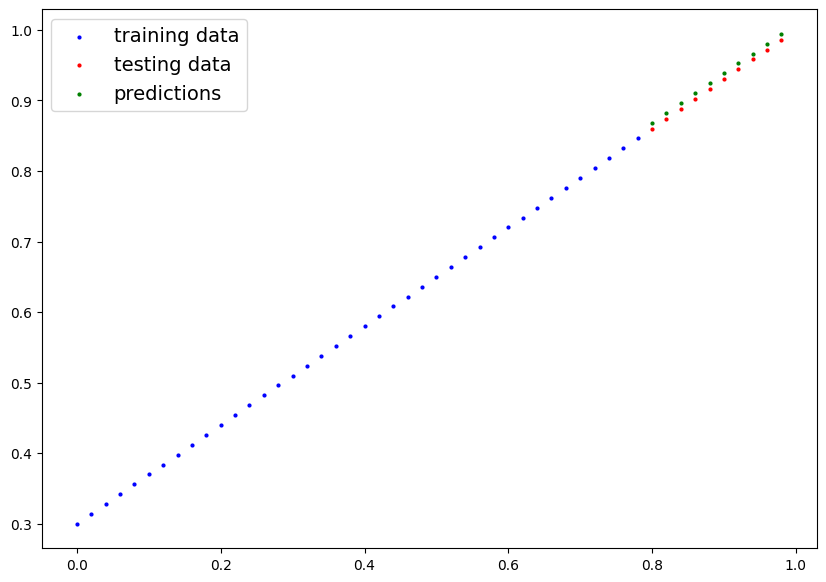

In [149]:
with torch.inference_mode():
  y_pred=model_0(x_test)
  plot_pred(predictions=y_pred)

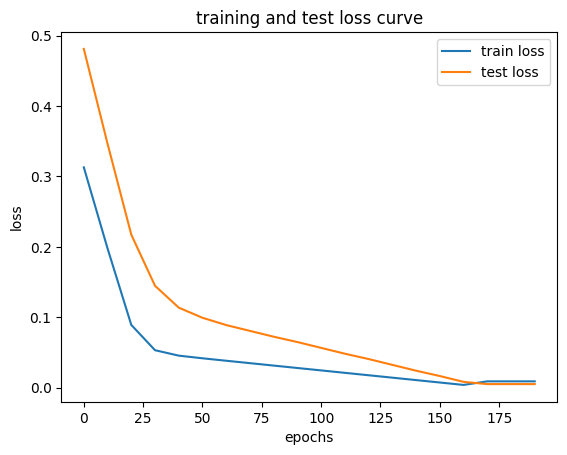

In [152]:
#plot the loss curves
plt.plot(torch.tensor(epoch_count).numpy(),torch.tensor(loss_values).numpy(),label="train loss")
plt.plot(torch.tensor(epoch_count).numpy(),torch.tensor(test_loss_values).numpy(),label="test loss")
plt.title("training and test loss curve")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.legend()

In [154]:
#saving a model
from pathlib import Path

#creating directory
MODEL_PATH=Path("models")
MODEL_PATH.mkdir(parents=True,exist_ok=True)
MODEL_NAME="model_01.pth"
MODEL_SAVE_PATH=MODEL_PATH/MODEL_NAME


#saving model
print(f"saving to {MODEL_SAVE_PATH}")
torch.save(obj=model_0.state_dict(),f=MODEL_SAVE_PATH)

saving to models/model_01.pth


In [155]:
#loading a model
loaded_model=LinearRegressionModel()
loaded_model.load_state_dict(torch.load(f=MODEL_SAVE_PATH))
loaded_model.state_dict()

OrderedDict([('weight', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [1]:
#putting it all together
import torch
from torch import nn
import matplotlib.pyplot as plt



In [2]:
#setup device agnostic code
device="cuda" if torch.cuda.is_available() else "cpu"
print(f"using {device}")

using cuda


In [3]:
#data for the formula weight*x + bias = y
weight =0.9
bias =0.2

start=0
end=1
step=0.02

#create x=features and y=labels
x=torch.arange(start,end,step).unsqueeze(dim=1)

y=weight*x + bias

In [4]:
train_split=int(0.8*len(x))
x_train=x[:train_split]
y_train=y[:train_split]

x_test = x[train_split:]
y_test = y[train_split:]


In [5]:
def plot_pred(train_data=x_train,train_label=y_train,test_data=x_test,test_label=y_test,predictions=None):
  "plot"
  plt.figure(figsize=(8,5))
  plt.scatter(train_data,train_label,c="b",s=4,label="training data")

  plt.scatter(test_data,test_label,c="r",s=4,label="testing data")

  if predictions!=None:
    plt.scatter(test_data,predictions,c="g",s=4,label="predictions")
  plt.legend(prop={"size":14})

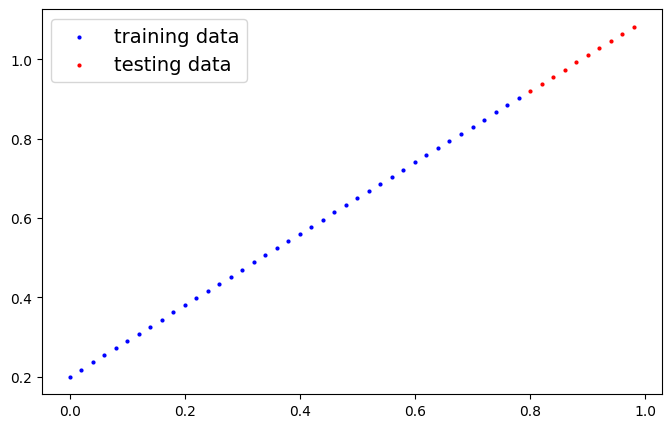

In [6]:
plot_pred()

In [7]:
#create a linear mode
class LinearRegressionModel2(nn.Module):
  def __init__(self):
    super().__init__()
    self.linear_layer=nn.Linear(in_features=1,out_features=1)
  def forward(self,x:torch.tensor)->torch.tensor:
    return self.linear_layer(x)

torch.manual_seed(42)
model_1=LinearRegressionModel2()
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
             ('linear_layer.bias', tensor([0.8300]))])

In [8]:
#set the model to the device
model_1.to(device)
next(model_1.parameters()).device

device(type='cuda', index=0)

In [9]:
loss_fn=nn.L1Loss()
optimizer=torch.optim.SGD(params=model_1.parameters(),lr=0.01)


In [10]:
torch.manual_seed(42)

epochs=400

#put data on the device
x_train=x_train.to(device)
y_train=y_train.to(device)
x_test=x_test.to(device)
y_test=y_test.to(device)

for epoch in range(epochs):
  model_1.train()

  y_pred=model_1(x_train)

  loss=loss_fn(y_pred,y_train)

  optimizer.zero_grad()

  loss.backward()
  optimizer.step()

  #testing
  model_1.eval()
  with torch.inference_mode():
    test_pred = model_1(x_test)
    test_loss = loss_fn(test_pred,y_test)

  if epoch % 10 == 0:
    print(f"epoch: {epoch} loss: {loss} test loss: {test_loss}")

epoch: 0 loss: 0.5771779417991638 test loss: 0.4959762692451477
epoch: 10 loss: 0.4619680345058441 test loss: 0.36126643419265747
epoch: 20 loss: 0.3467581868171692 test loss: 0.22655658423900604
epoch: 30 loss: 0.23154833912849426 test loss: 0.09184672683477402
epoch: 40 loss: 0.11633846908807755 test loss: 0.04286307841539383
epoch: 50 loss: 0.06952286511659622 test loss: 0.11123485863208771
epoch: 60 loss: 0.06158292293548584 test loss: 0.1282694786787033
epoch: 70 loss: 0.05754905566573143 test loss: 0.12829315662384033
epoch: 80 loss: 0.05402094125747681 test loss: 0.12414190918207169
epoch: 90 loss: 0.050549186766147614 test loss: 0.11724313348531723
epoch: 100 loss: 0.047114234417676926 test loss: 0.10965748131275177
epoch: 110 loss: 0.043684374541044235 test loss: 0.10138493031263351
epoch: 120 loss: 0.04024557024240494 test loss: 0.09311238676309586
epoch: 130 loss: 0.036812301725149155 test loss: 0.0855267345905304
epoch: 140 loss: 0.03338075056672096 test loss: 0.07725419104

In [11]:
model_1.state_dict(),weight,bias

(OrderedDict([('linear_layer.weight', tensor([[0.8936]], device='cuda:0')),
              ('linear_layer.bias', tensor([0.1980], device='cuda:0'))]),
 0.9,
 0.2)

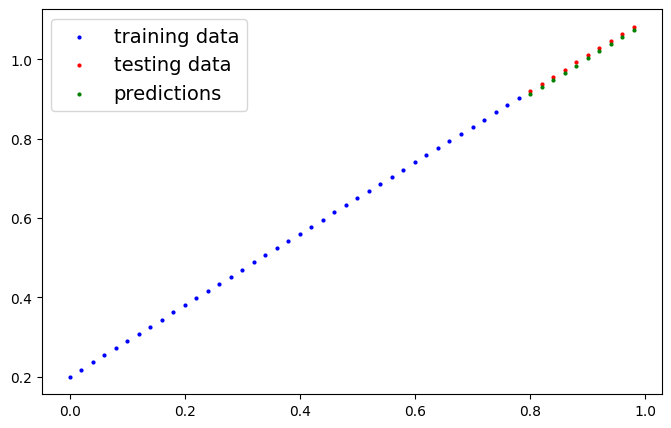

In [14]:
model_1.eval()
with torch.inference_mode():
  y_preds=model_1(x_test)
y_preds
plot_pred(predictions=y_preds.cpu())

In [16]:
#save the model
from pathlib import Path

#creating directory
MODEL_PATH=Path("models")
MODEL_PATH.mkdir(parents=True,exist_ok=True)
MODEL_NAME="model_01.pth"
MODEL_SAVE_PATH=MODEL_PATH/MODEL_NAME


#saving model
print(f"saving to {MODEL_SAVE_PATH}")
torch.save(obj=model_1.state_dict(),f=MODEL_SAVE_PATH)

saving to models/model_01.pth


In [19]:
#loading a model
loaded_model=LinearRegressionModel2()
loaded_model.load_state_dict(torch.load(f=MODEL_SAVE_PATH))
loaded_model.to(device)
loaded_model.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.8936]], device='cuda:0')),
             ('linear_layer.bias', tensor([0.1980], device='cuda:0'))])